# Java 重写(Override)与重载(Overload)
## 重写(Override)
重写是子类对父类的允许访问的方法的实现过程进行重新编写, 返回值和形参都不能改变。**即外壳不变，核心重写**！

重写的好处在于子类可以根据需要，定义特定于自己的行为。 也就是说子类能够根据需要实现父类的方法。

重写方法不能抛出新的检查异常或者比被重写方法申明更加宽泛的异常。例如： 父类的一个方法申明了一个检查异常 IOException，但是在重写这个方法的时候不能抛出 Exception 异常，因为 Exception 是 IOException 的父类，只能抛出 IOException 的子类异常。

在面向对象原则里，重写意味着可以重写任何现有方法。实例如下：

In [45]:
class Animal{
   public void move(){
      System.out.println("动物可以移动");
   }
}
 
class Dog extends Animal{
   public void move(){
      System.out.println("狗可以跑和走");
   }
}
 
public class TestDog{
   public static void main(){
      Animal a = new Animal(); // Animal 对象
      Animal b = new Dog(); // Dog 对象
 
      a.move();// 执行 Animal 类的方法
 
      b.move();//执行 Dog 类的方法
   }
}

TestDog.main();

动物可以移动
狗可以跑和走


在上面的例子中可以看到，尽管 b 属于 Animal 类型，但是它运行的是 Dog 类的 move方法。

这是由于在编译阶段，只是检查参数的引用类型。

然而在运行时，Java 虚拟机(JVM)指定对象的类型并且运行该对象的方法。

因此在上面的例子中，之所以能编译成功，是因为 Animal 类中存在 move 方法，然而运行时，运行的是特定对象的方法。

思考以下例子：

In [50]:
class Animal{
   public void move(){
      System.out.println("动物可以移动");
   }
}
 
class Dog extends Animal{
   public void move(){
      System.out.println("狗可以跑和走");
   }
   public void bark(){
      System.out.println("狗可以吠叫");
   }
}
 
public class TestDog{
   public static void main(){
      Animal a = new Animal(); // Animal 对象
      Animal b = new Dog(); // Dog 对象
 
      a.move();// 执行 Animal 类的方法
      b.move();//执行 Dog 类的方法
      b.bark();
   }
}

TestDog.main();

UnresolvedReferenceException: Attempt to use definition snippet with unresolved references in Snippet:ClassKey(TestDog)#15-
 
public class TestDog{
   public static void main(){
      Animal a = new Animal(); // Animal 对象
      Animal b = new Dog(); // Dog 对象
 
      a.move();// 执行 Animal 类的方法
      b.move();//执行 Dog 类的方法
      b.bark();
   }
}

以上实例编译运行结果如下：
```java
TestDog.java:30: cannot find symbol
symbol  : method bark()
location: class Animal
                b.bark();
                 ^
```
该程序将抛出一个编译错误，因为b的引用类型Animal没有bark方法。

## 方法的重写规则
- 参数列表与被重写方法的参数列表必须完全相同。
- 返回类型与被重写方法的返回类型可以不相同，但是必须是父类返回值的派生类（java5 及更早版本返回类型要一样，java7 及更高版本可以不同）。
- 访问权限不能比父类中被重写的方法的访问权限更低。例如：如果父类的一个方法被声明为 public，那么在子类中重写该方法就不能声明为 protected。
- 父类的成员方法只能被它的子类重写。
- 声明为 final 的方法不能被重写。
- 声明为 static 的方法不能被重写，但是能够被再次声明。
- 子类和父类在同一个包中，那么子类可以重写父类所有方法，除了声明为 private 和 final 的方法。
- 子类和父类不在同一个包中，那么子类只能够重写父类的声明为 public 和 protected 的非 final 方法。
- 重写的方法能够抛出任何非强制异常，无论被重写的方法是否抛出异常。但是，重写的方法不能抛出新的强制性异常，或者比被重写方法声明的更广泛的强制性异常，反之则可以。
- 构造方法不能被重写。
- 如果不能继承一个类，则不能重写该类的方法。

### 补充
<details><summary>java 强制性异常与非强制性异常</summary><p>

java的异常处理机制是一项相当灵活的技术。也是java的特色。项目做的够不够出色，很大一部分取决于异常的处理。 如何自定义异常，是该try catch还是该throws ，这些都是我们该注意的方面。 

java中的异常分为两大类， 强制性异常(CheckedException)和非强制性异常(UncheckedException)。 而**java中除了RuntimeException外，都是强制性异常**。 

强制性异常：所谓强制性异常就是在编写程序的过程中必需在抛出异常的部分try catch  或者向上throws异常。 
非强制性异常：所谓非强制性异常就和上面相反了。不过你当然也可以try catch或者thows，只不过这不是强制性的。
</p></details>


## Super 关键字的使用
当需要在子类中调用父类的被重写方法时，要使用 super 关键字。

In [51]:
class Animal{
   public void move(){
      System.out.println("动物可以移动");
   }
}
 
class Dog extends Animal{
   public void move(){
      super.move(); // 应用super类的方法
      System.out.println("狗可以跑和走");
   }
}
 
public class TestDog{
   public static void main(){
 
      Animal b = new Dog(); // Dog 对象
      b.move(); //执行 Dog类的方法
 
   }
}

TestDog.main();

动物可以移动
狗可以跑和走


## 重载(Overload)
重载(overloading) 是在一个类里面，方法名字相同，而参数不同。返回类型可以相同也可以不同。

每个重载的方法（或者构造函数）都必须有一个独一无二的参数类型列表。

最常用的地方就是构造器的重载。

**重载规则:**

- 被重载的方法必须改变参数列表(参数个数或类型不一样)；
- 被重载的方法可以改变返回类型；
- 被重载的方法可以改变访问修饰符；
- 被重载的方法可以声明新的或更广的检查异常；
- 方法能够在同一个类中或者在一个子类中被重载。
- 无法以返回值类型作为重载函数的区分标准。

In [55]:
public class Overloading {
    public int test(){
        System.out.println("test1");
        return 1;
    }
 
    public void test(int a){
        System.out.println("test2");
    }   
 
    //以下两个参数类型顺序不同
    public String test(int a,String s){
        System.out.println("test3");
        return "returntest3";
    }   
 
    public String test(String s,int a){
        System.out.println("test4");
        return "returntest4";
    }   
 
    public static void main(){
        Overloading o = new Overloading();
        System.out.println(o.test());
        o.test(1);
        System.out.println(o.test(1,"test3"));
        System.out.println(o.test("test4",1));
    }
}

main();

动物可以移动
动物可以移动
狗可以跑和走


## 重写与重载之间的区别
|区别点|	重载方法|	重写方法|
|:--|:--|:--|
|参数列表|	必须修改|	一定不能修改|
|返回类型|可以修改	|一定不能修改|
|异常|	可以修改|	可以减少或删除，一定不能抛出新的或者更广的异常|
|访问|	可以修改|	一定不能做更严格的限制（可以降低限制）|

## 总结
方法的重写(Overriding)和重载(Overloading)是java多态性的不同表现，重写是父类与子类之间多态性的一种表现，重载可以理解成多态的具体表现形式。

- (1)方法重载是一个类中定义了多个方法名相同,而他们的参数的数量不同或数量相同而类型和次序不同,则称为方法的重载(Overloading)。
- (2)方法重写是在子类存在方法与父类的方法的名字相同,而且参数的个数与类型一样,返回值也一样的方法,就称为重写(Overriding)。
- (3)方法重载是一个类的多态性表现,而方法重写是子类与父类的一种多态性表现。

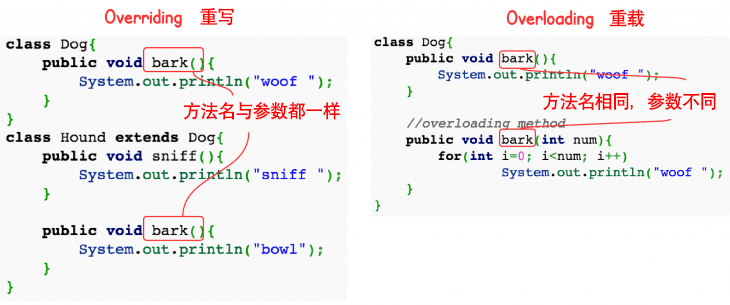
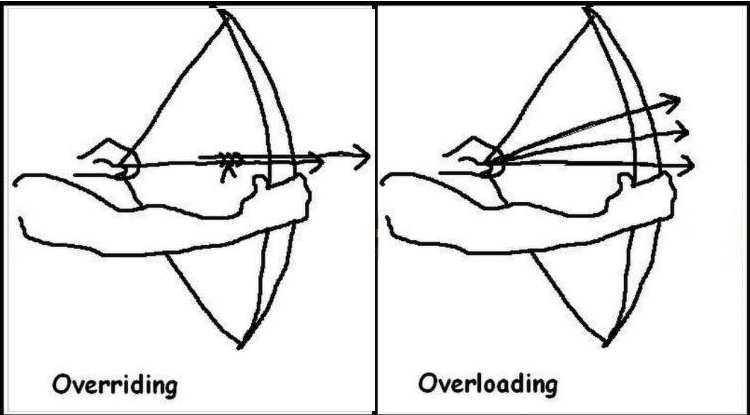